In [1]:
## Loading the data

import os
print(os.listdir('../input/building-permit-applications-data'))

['Building_Permits.csv', 'DataDictionaryBuildingPermit.xlsx']


In [2]:
import pandas as pd
df = pd.read_csv('../input/building-permit-applications-data/Building_Permits.csv')

/tmp/ipykernel_18/847690978.py:2: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../input/building-permit-applications-data/Building_Permits.csv')


In [3]:
## Exploring the data

print("First five rosws of dataset")
print(df.head())

First five rosws of dataset
  Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023            140                  NaN   
1           04/19/2016  0306  007            440                  NaN   
2           05/27/2016  0595  203           1647                  NaN   
3           11/07/2016  0156  011           1230                  NaN   
4           11/28/2016  0342  001            950                  NaN   

  Street Name Street Suffix  ...  Existing Construction Type  \
0       Ellis            St  ...                         3.0   
1       

In [4]:
print(df.describe())

         Permit Type  Street Number          Unit  Number of Existing Stories  \
count  198900.000000  198900.000000  29479.000000               156116.000000   
mean        7.522323    1121.728944     78.517182                    5.705773   
std         1.457451    1135.768948    326.981324                    8.613455   
min         1.000000       0.000000      0.000000                    0.000000   
25%         8.000000     235.000000      0.000000                    2.000000   
50%         8.000000     710.000000      0.000000                    3.000000   
75%         8.000000    1700.000000      1.000000                    4.000000   
max         8.000000    8400.000000   6004.000000                   78.000000   

       Number of Proposed Stories  Estimated Cost  Revised Cost  \
count               156032.000000    1.608340e+05  1.928340e+05   
mean                     5.745043    1.689554e+05  1.328562e+05   
std                      8.613284    3.630386e+06  3.584903e+06   
mi

In [5]:
print("dataset information")
print(df.info())

dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                    

In [6]:
## Data cleaning part

print('remove rows with missing "Estimated cost" and "Revised Cost" values.' )
rows_before = df.shape[0]
print(f"Rows before cleaning (dropping) : {rows_before}")
df_cleaned = df.dropna(subset=['Estimated Cost'])
rows_after = df_cleaned.shape[0]
print(f"Rows after cleaning : {rows_after}")

print(f"Rows before cleaning Revised cost (dropping) : {rows_after}")
df_cleaned = df_cleaned.dropna(subset=('Revised Cost'))
rows_aftercleaned = df_cleaned.shape[0]
print(f"Rows after cleaning Revised: {rows_aftercleaned}")

#lets drop all the rows except those which have 'site permit'
df_cleaned=df_cleaned.dropna(subset=['Site Permit'])
df_after_site = df_cleaned.shape[0]
print(f"Rows after cleaning site permit : {df_after_site}")


remove rows with missing "Estimated cost" and "Revised Cost" values.
Rows before cleaning (dropping) : 198900
Rows after cleaning : 160834
Rows before cleaning Revised cost (dropping) : 160834
Rows after cleaning Revised: 155373
Rows after cleaning site permit : 3440


In [7]:
print("Filling missing value with 0")
df_filled = df_cleaned.fillna(0)
## if i filled mean value 
print(df_filled[df_filled.isnull().any(axis=1)])

Filling missing value with 0
Empty DataFrame
Columns: [Permit Number, Permit Type, Permit Type Definition, Permit Creation Date, Block, Lot, Street Number, Street Number Suffix, Street Name, Street Suffix, Unit, Unit Suffix, Description, Current Status, Current Status Date, Filed Date, Issued Date, Completed Date, First Construction Document Date, Structural Notification, Number of Existing Stories, Number of Proposed Stories, Voluntary Soft-Story Retrofit, Fire Only Permit, Permit Expiration Date, Estimated Cost, Revised Cost, Existing Use, Existing Units, Proposed Use, Proposed Units, Plansets, TIDF Compliance, Existing Construction Type, Existing Construction Type Description, Proposed Construction Type, Proposed Construction Type Description, Site Permit, Supervisor District, Neighborhoods - Analysis Boundaries, Zipcode, Location, Record ID]
Index: []

[0 rows x 43 columns]


/tmp/ipykernel_18/1239172955.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled = df_cleaned.fillna(0)


In [8]:
## Data filtering/cleaning part

 ## i want to check no. of permit have more than 15 stories , from the filtered data 
threshold_value = 15
df_filtered = df_filled[df_filled['Number of Existing Stories'] >= threshold_value]
df_before = df_filled.shape[0]
df_after = df_filtered.shape[0]

print(f"Rows before filtering permit have more than 15 stories : {df_before} ")
print(f"Rows after filtering permit have more than 15 stories : {df_after} ")

Rows before filtering permit have more than 15 stories : 3440 
Rows after filtering permit have more than 15 stories : 13 


In [9]:
print(df_filtered.head())

      Permit Number  Permit Type            Permit Type Definition  \
33959  201312164258            3  additions alterations or repairs   
45138  201404163418            3  additions alterations or repairs   
45139  201404163418            3  additions alterations or repairs   
55251  201407211686            3  additions alterations or repairs   
55739  201407242073            3  additions alterations or repairs   

      Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
33959           12/16/2013  0295  016            345                    0   
45138           04/16/2014  3719  011            181                    0   
45139           04/16/2014  3719  010            183                    0   
55251           07/21/2014  0263  011            101                    0   
55739           07/24/2014  3507  040           1455                    0   

      Street Name Street Suffix  ...  Existing Construction Type  \
33959    Stockton            St  ...            

In [10]:
print(df_filtered.tail())

       Permit Number  Permit Type            Permit Type Definition  \
73517   201501226451            3  additions alterations or repairs   
73518   201501226451            3  additions alterations or repairs   
73519   201501226451            3  additions alterations or repairs   
89414   201506189323            3  additions alterations or repairs   
171897  201506058287            3  additions alterations or repairs   

       Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
73517            01/22/2015  0813  008           1390                    0   
73518            01/22/2015  0813  009           1390                    0   
73519            01/22/2015  0813  010           1390                    0   
89414            06/18/2015  3701  065           1275                    0   
171897           06/05/2015  3701  065           1275                    0   

       Street Name Street Suffix  ...  Existing Construction Type  \
73517       Market            St  .

In [11]:
import numpy as np

In [12]:
estimated_cost = df_filtered['Estimated Cost'].to_numpy()
revised_cost = df_filtered['Revised Cost'].to_numpy()
existing_units= df_filtered['Existing Units'].to_numpy()
Proposed_units = df_filtered['Proposed Units'].to_numpy()
existing_stories = df_filtered['Number of Existing Stories'].to_numpy()
proposed_stories = df_filtered['Number of Proposed Stories'].to_numpy()

In [13]:
#element wise substraction
cost_diff = np.subtract(revised_cost,estimated_cost)
#Element wise multiplication
units_product = np.multiply(existing_units,existing_stories)
#Element wise sum
stories_sum = np.add(existing_stories,proposed_stories)

print("Revised Cost and Estimates Cost Difference : ", cost_diff)
print("Total units per permit : ", units_product)
print("New no. of total stories : ", stories_sum)


Revised Cost and Estimates Cost Difference :  [500000.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.]
Total units per permit :  [23975.  3996.  3996.     0.     0.  5143.  5143. 12992. 12992. 12992.
 12992.     0.     0.]
New no. of total stories :  [ 70. 109. 109.  96.  46.  74.  74.  58.  58.  58.  58.  34.  34.]


In [14]:
sorted_stories = np.sort(existing_stories)
top_5_stories = sorted_stories[-5:]
bottom_5_stories = sorted_stories [:5]

print("Top 5 tallest buildings:" , top_5_stories)

Top 5 tallest buildings: [37. 37. 48. 54. 54.]


In [15]:
mean_units = np.mean(existing_units)
median_stories = np.median(existing_stories)

print("Mean no. of units", mean_units)
print("Median number of existing stories", median_stories)

Mean no. of units 223.30769230769232
Median number of existing stories 29.0


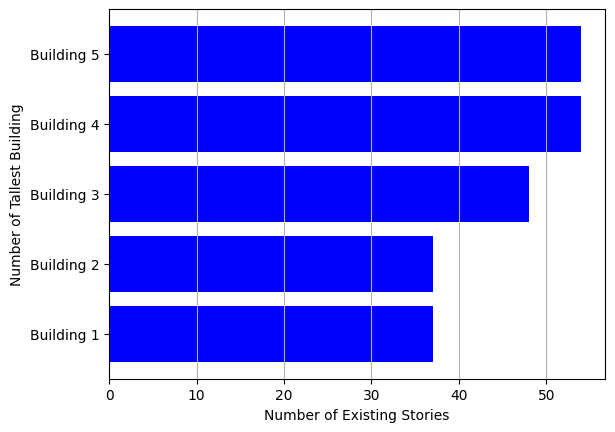

In [16]:
import matplotlib.pyplot as plt
#plotting the top 5 tallest buildings
plt.barh(range(len(top_5_stories)),top_5_stories, color = 'blue')
plt.xlabel('Number of Existing Stories')
plt.ylabel('Number of Tallest Building')
plt.yticks(range(len(top_5_stories)),['Building {}'.format(i+1) for i in range(len(top_5_stories))])
plt.grid(axis='x')
plt.savefig('bar_plot.png', dpi= 300)

In [17]:
print(os.listdir('../working'))

['__notebook__.ipynb', 'bar_plot.png']
